# 05 - Sentiment analysis by country - Exercise 2

In [1]:
%matplotlib inline
import pycountry
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

##### JUST RUN ONCE ######
# import nltk
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

/Users/Sym/anaconda/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
path_emails = 'hillary-clinton-emails/Emails.csv'

emails = pd.read_csv(path_emails, usecols=['ExtractedSubject','ExtractedBodyText'])
emails.fillna(' ', inplace=True)
emails['subject_body'] = emails['ExtractedSubject'] + ' ' + emails['ExtractedBodyText']
emails_raw = np.asarray(emails['subject_body'])

email_tokens = []

for email in emails_raw:
    email_tokens.append(regexp_tokenize(email, pattern='\w+'))
    
stop_words = set(stopwords.words('english'))
stopwords_emails = ['fyi', 'fm', 'am', 'pm', 'n\'t', 'sent', 'from', 'to', 'subject', 'fw', 'fwd', 'fvv',
                    'cc', 'bcc', 'attachments', 're', 'date', 'html', 'php']
stop_words.update(stopwords_emails)

email_clean_tokens = []

# remove stopwords and numbers
for email in email_tokens:
    clean_tokens = [token for token in email if token.lower() not in stop_words 
                    and token.isdigit() == False 
                    and len(token) > 1]
    email_clean_tokens.append(clean_tokens)

In [3]:
def get_countries(email_tokens, df):
    countries = dict()
    for token in email_tokens:
        for country in pycountry.countries:
            if (token.lower() == country.name.lower()
               or token == country.alpha_2
               or token == country.alpha_3):
                if (country.name in countries):
                    countries[country.name] += 1
                else:
                    countries[country.name] = 1
                df.set_value(country.name, 'number occurences', df.get_value(country.name, 'number occurences') + 1)
        if (token.lower() == 'syria'):
            if ('Syria' in countries):
                countries['Syria'] += 1
            else:
                countries['Syria'] = 1
            df.set_value('Syria', 'number occurences', df.get_value('Syria', 'number occurences') + 1)
    return countries

In [18]:
countries = ['Syria']
for country in pycountry.countries:
    countries.append(country.name)
    
df = pd.DataFrame(index=countries, columns=['number occurences', 'polarity sentiment'])
df.fillna(0.0, inplace=True)
df.head()

,number occurences,polarity sentiment
Syria,0.0,0.0
Aruba,0.0,0.0
Afghanistan,0.0,0.0
Angola,0.0,0.0
Anguilla,0.0,0.0


In [34]:
all_countries = []
for email in email_clean_tokens:
    all_countries.append(get_countries(email, df))

In [35]:
all_sentiments = []
sia = SentimentIntensityAnalyzer()
for i in range(len(email_clean_tokens)):
    sentiment = sia.polarity_scores(emails_raw[i])['compound']
    for country in all_countries[i].keys():
        df.set_value(country, 'polarity sentiment', df.get_value(country, 'polarity sentiment') + sentiment * all_countries[i][country])
    all_sentiments.append(sentiment)

In [38]:
clean_df = df.copy()
clean_df = clean_df.loc[clean_df['number occurences']  >= 25.0]

clean_df['polarity level'] = clean_df['polarity sentiment'] / clean_df['number occurences']
clean_df.sort_values(['polarity level'], inplace=True)
clean_df

,number occurences,polarity sentiment,polarity level
Greece,28.0,-11.5238,-0.411564
France,47.0,-14.3208,-0.304698
Yemen,23.0,1.2256,0.053287
Syria,31.0,3.3586,0.108342
Iraq,210.0,27.1158,0.129123
Sudan,61.0,11.4900,0.188361
Poland,41.0,8.0812,0.197102
Congo,23.0,6.3086,0.274287
Libya,224.0,62.1648,0.277521
Jordan,35.0,11.6030,0.331514


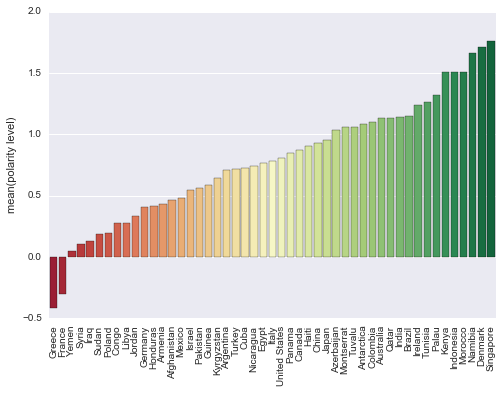

In [39]:
plt.xticks(rotation=90)
graph = sns.barplot(x=clean_df.index, y=clean_df['polarity level'], palette='RdYlGn')